In [2]:
#data frames and data manipulation
import pandas as pd
import numpy as np

#Visualization
import matplotlib.pyplot as plt
import seaborn as sns

#Feature Engineering
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.cluster import KMeans

#Model 
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import accuracy_score 
from sklearn.metrics import confusion_matrix
import warnings
warnings.filterwarnings('ignore')

# Data Pre - Processing

In [3]:
#Load the dataset
df=pd.read_csv("survey lung cancer.csv")
df.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


Brief description of the dataset:

GENDER: The gender of the individual (Male or Female).

AGE: The age of the individual in years.

SMOKING: Indicates if the individual smokes ('2' for yes, '1' for no).

YELLOW_FINGERS: Denotes the presence of yellow fingers ('2' for yes, '1' for no), a potential sign associated with smoking.

ANXIETY: Indicates if the individual experiences anxiety ('2' for yes, '1' for no).

PEER_PRESSURE: Suggests if peer pressure influences the individual's habits ('2' for yes, '1' for no).

CHRONIC DISEASE: Indicates the presence of any chronic diseases ('2' for yes, '1' for no).

FATIGUE: Denotes if the individual frequently feels fatigued ('2' for yes, '1' for no).

ALLERGY: Indicates if the individual has allergies ('2' for yes, '1' for no).

WHEEZING: Represents whether the individual experiences wheezing ('2' for yes, '1' for no).

ALCOHOL CONSUMING: Indicates alcohol consumption habits ('2' for yes, '1' for no).

COUGHING: Represents whether the individual has a cough ('2' for yes, '1' for no).

SHORTNESS OF BREATH: Indicates if the individual experiences shortness of breath ('2' for yes, '1' for no).

SWALLOWING DIFFICULTY: Denotes difficulty in swallowing ('2' for yes, '1' for no).

CHEST PAIN: Indicates the presence of chest pain ('2' for yes, '1' for no).

LUNG_CANCER: The target variable, indicating whether the individual has lung cancer ('2' for yes, '1' for no).

In [4]:
df.shape
df.dtypes


GENDER                   object
AGE                       int64
SMOKING                   int64
YELLOW_FINGERS            int64
ANXIETY                   int64
PEER_PRESSURE             int64
CHRONIC DISEASE           int64
FATIGUE                   int64
ALLERGY                   int64
WHEEZING                  int64
ALCOHOL CONSUMING         int64
COUGHING                  int64
SHORTNESS OF BREATH       int64
SWALLOWING DIFFICULTY     int64
CHEST PAIN                int64
LUNG_CANCER              object
dtype: object

In [5]:
#Check for missing values
print(df.isnull().sum())

#Remove missing values 
df = df.dropna()

GENDER                   0
AGE                      0
SMOKING                  0
YELLOW_FINGERS           0
ANXIETY                  0
PEER_PRESSURE            0
CHRONIC DISEASE          0
FATIGUE                  0
ALLERGY                  0
WHEEZING                 0
ALCOHOL CONSUMING        0
COUGHING                 0
SHORTNESS OF BREATH      0
SWALLOWING DIFFICULTY    0
CHEST PAIN               0
LUNG_CANCER              0
dtype: int64


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 309 non-null    object
 1   AGE                    309 non-null    int64 
 2   SMOKING                309 non-null    int64 
 3   YELLOW_FINGERS         309 non-null    int64 
 4   ANXIETY                309 non-null    int64 
 5   PEER_PRESSURE          309 non-null    int64 
 6   CHRONIC DISEASE        309 non-null    int64 
 7   FATIGUE                309 non-null    int64 
 8   ALLERGY                309 non-null    int64 
 9   WHEEZING               309 non-null    int64 
 10  ALCOHOL CONSUMING      309 non-null    int64 
 11  COUGHING               309 non-null    int64 
 12  SHORTNESS OF BREATH    309 non-null    int64 
 13  SWALLOWING DIFFICULTY  309 non-null    int64 
 14  CHEST PAIN             309 non-null    int64 
 15  LUNG_CANCER            

# Checking and removing duplicate values

In [7]:
df[df.duplicated()]

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
99,M,56,2,1,1,1,1,2,2,2,2,2,2,1,2,YES
100,M,58,2,1,1,1,1,1,2,2,2,2,1,1,1,YES
117,F,51,2,2,2,2,1,2,2,1,1,1,2,2,1,YES
199,F,55,2,1,1,2,2,2,2,2,2,1,1,2,2,YES
212,M,58,2,1,1,1,1,2,2,2,2,2,2,1,2,YES
223,M,63,2,2,2,1,2,2,2,2,1,1,2,1,1,YES
256,M,60,2,1,1,1,1,2,2,2,2,2,2,1,2,YES
275,M,64,2,2,2,2,2,1,1,1,2,1,1,2,2,YES
284,M,58,2,2,2,2,2,1,1,1,2,1,1,2,2,YES
285,F,58,2,2,2,2,1,2,1,1,1,2,2,2,1,YES


In [8]:
df.drop_duplicates()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279,F,59,1,2,2,2,1,1,2,2,1,2,1,2,1,YES
280,F,59,2,1,1,1,2,2,2,1,1,1,2,1,1,NO
281,M,55,2,1,1,1,1,2,2,1,1,1,2,1,2,NO
282,M,46,1,2,2,1,1,1,1,1,1,1,1,2,2,NO


In [9]:
df.columns = df.columns.str.strip()
#Convert '2' to '1' and '1' to '0'
new_columns = ['SMOKING', 'YELLOW_FINGERS', 'ANXIETY', 'PEER_PRESSURE', 
                      'CHRONIC DISEASE', 'FATIGUE', 'ALLERGY', 'WHEEZING', 
                      'ALCOHOL CONSUMING', 'COUGHING', 'SHORTNESS OF BREATH', 
                      'SWALLOWING DIFFICULTY', 'CHEST PAIN']

for col in new_columns:
    if col in df.columns:
        df[col] = df[col].map({2: 1, 1: 0})

# Convert 'YES' to '1' and 'NO' to '0' for the 'LUNG_CANCER' column
df['LUNG_CANCER'] = df['LUNG_CANCER'].map({'YES': 1, 'NO': 0})

df.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,0,1,1,0,0,1,0,1,1,1,1,1,1,1
1,M,74,1,0,0,0,1,1,1,0,0,0,1,1,1,1
2,F,59,0,0,0,1,0,1,0,1,0,1,1,0,1,0
3,M,63,1,1,1,0,0,0,0,0,1,0,0,1,1,0
4,F,63,0,1,0,0,0,0,0,1,0,1,1,0,0,0


# Correlation Heatmap

<AxesSubplot:>

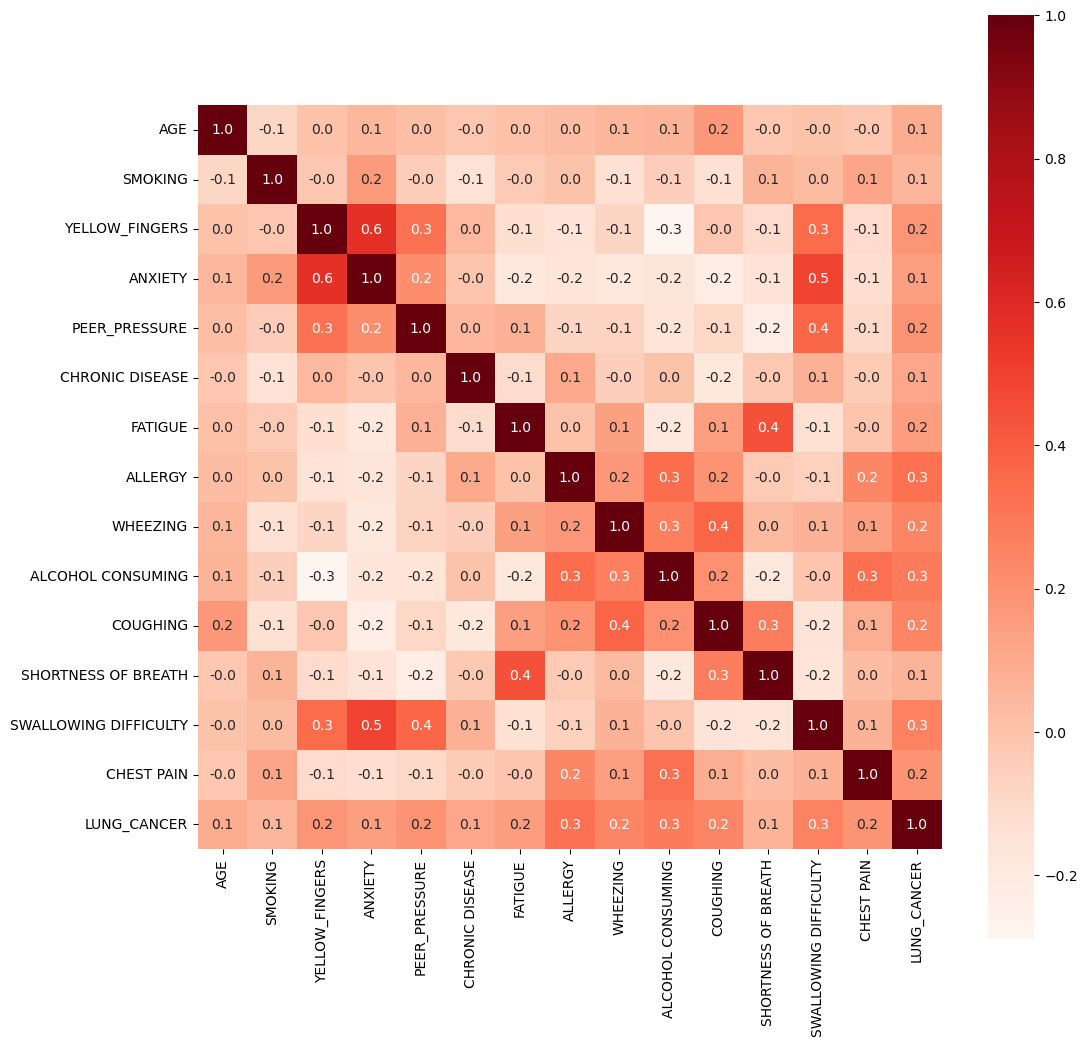

In [15]:
# We can use a heatmap to check correlation between the variables.

corr = df.corr(numeric_only = True)
plt.figure(figsize=(12,12))
sns.heatmap(corr,cbar=True,square=True,fmt='.1f',annot=True,cmap='Reds')

# Exploratory Data Analysis

# Box plot to show the relationship between age and gender

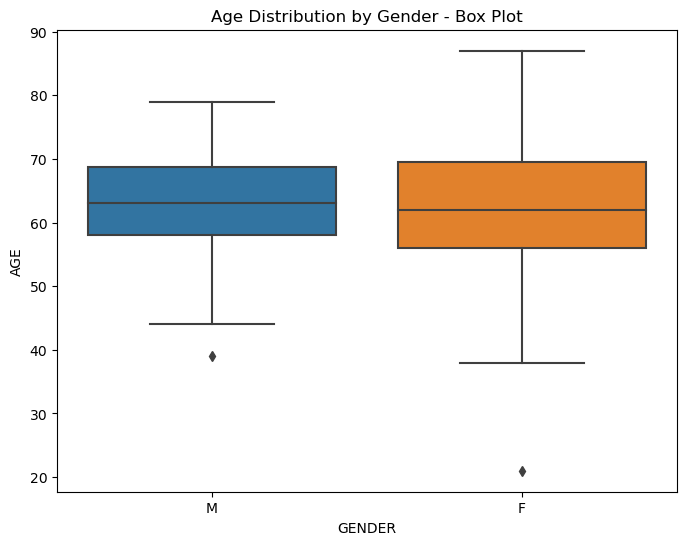

In [16]:
#Box Plot
plt.figure(figsize=(8, 6))
sns.boxplot(x='GENDER', y='AGE', data=df)
plt.title('Age Distribution by Gender - Box Plot')
plt.show()

The box plot visualizes the age distribution for two gender categories, Male (M) and Female (F). For both categories, the median age appears to be roughly the same, around the mid-60s. However, the age range for males extends slightly lower than for females, as indicated by the longer lower whisker and the presence of an outlier, suggesting that there are younger males in the dataset. The interquartile range (the box itself) is similar for both genders, indicating similar variability in age distribution among the middle 50% of the samples for both genders.

# Histogram for specified conditions

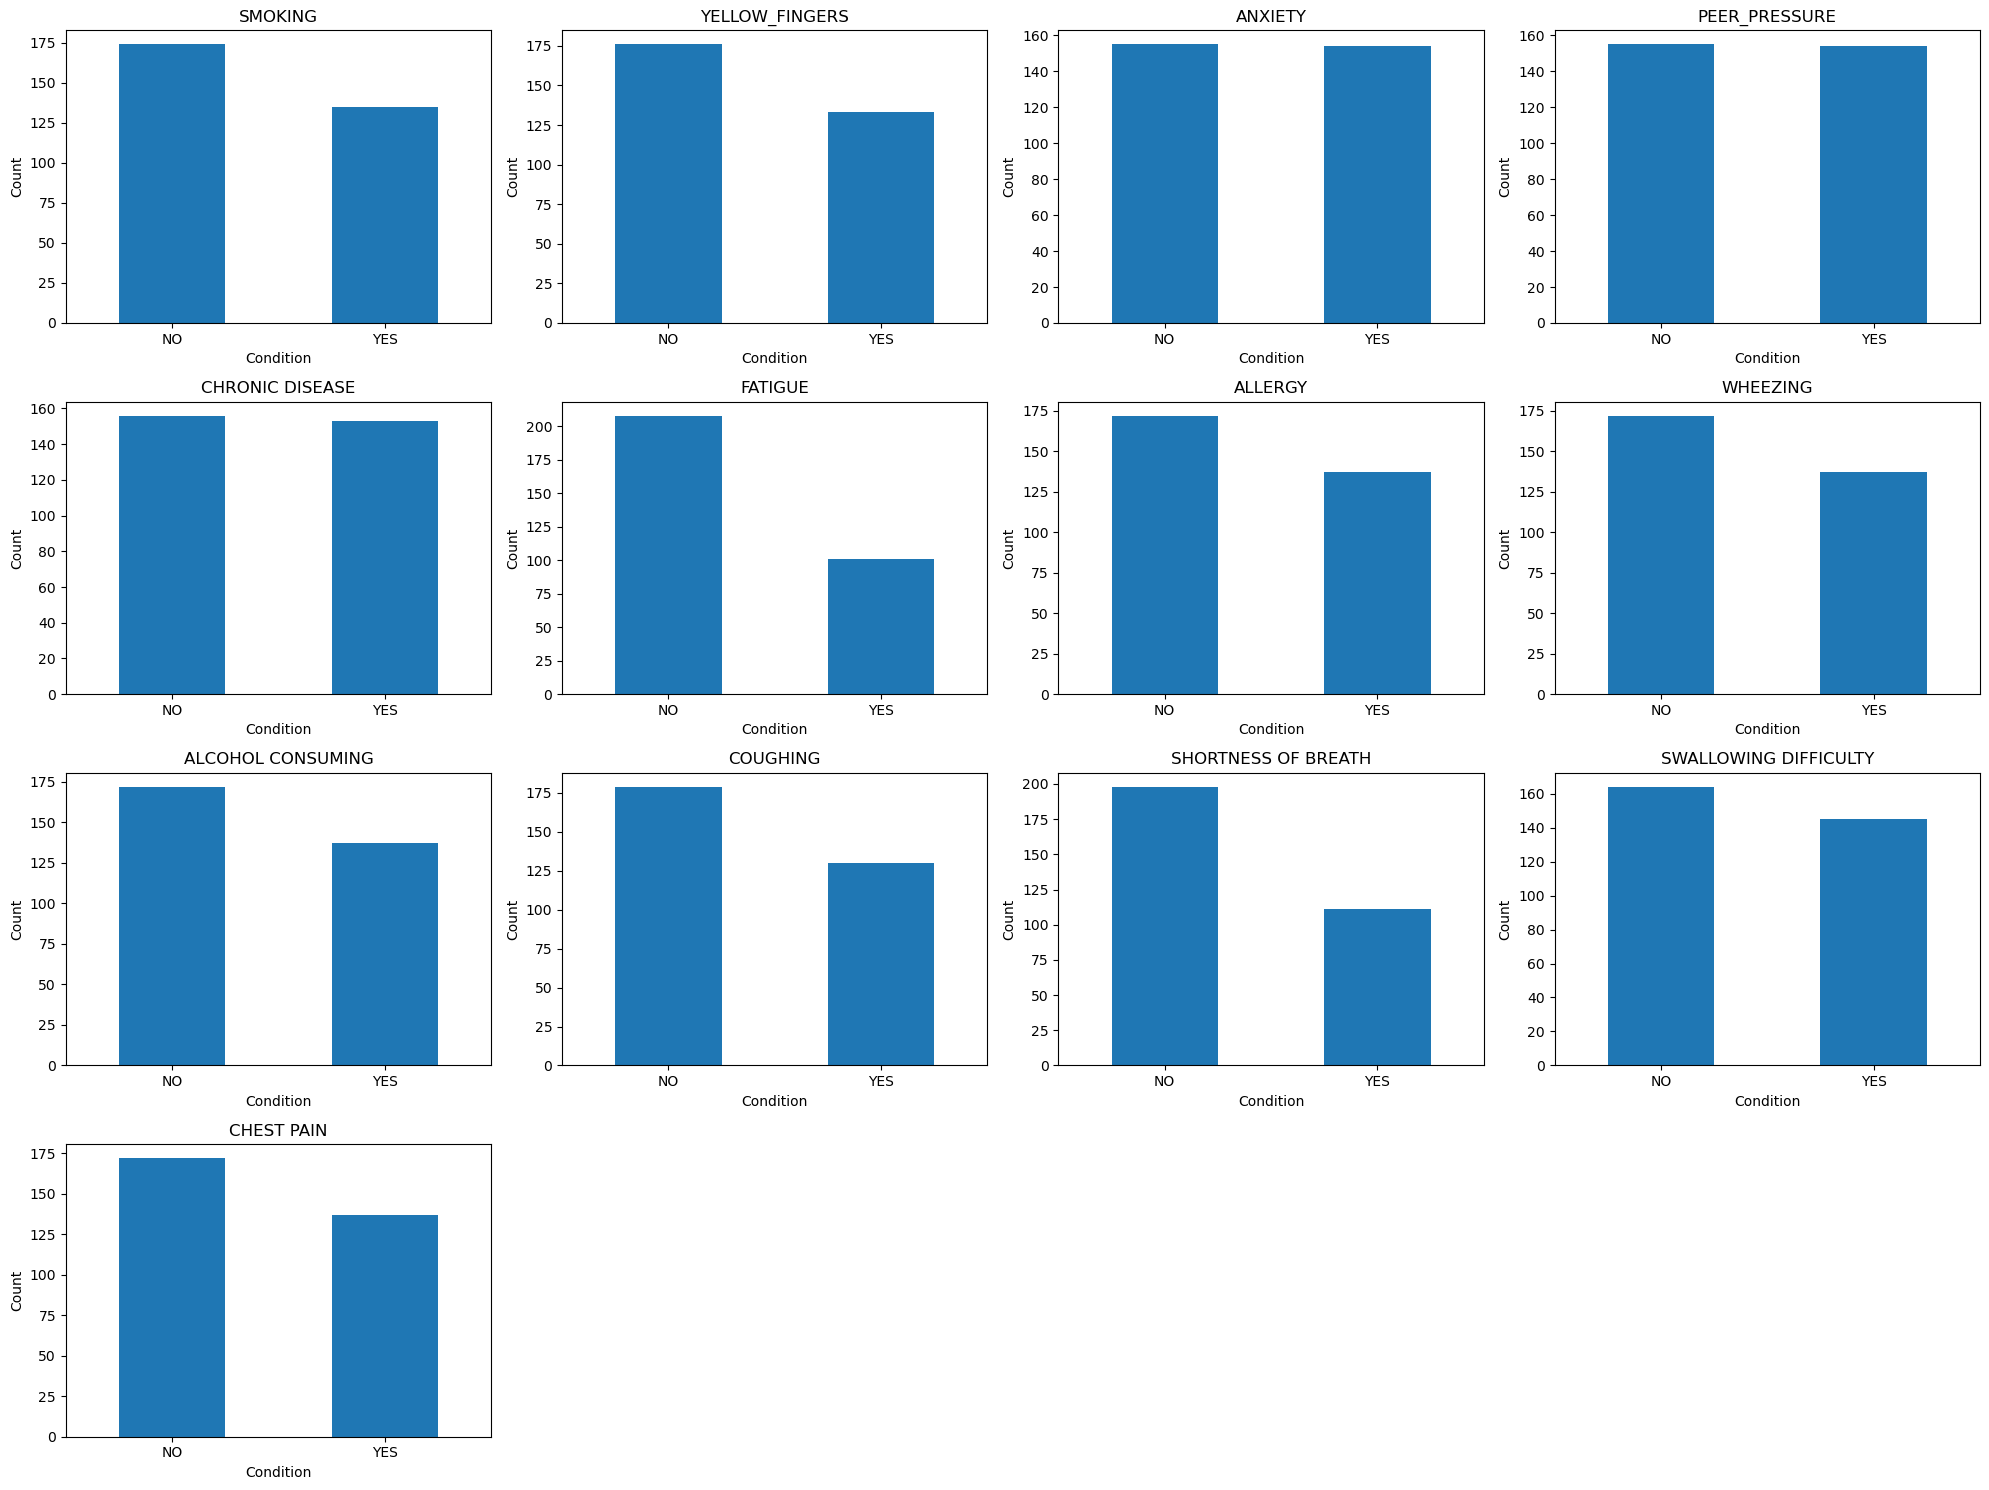

In [17]:
def plot_histograms(dataframe, columns_list):
    plt.figure(figsize=(20, 15))
    for i, col in enumerate(columns_list, 1):
        plt.subplot(4, 4, i)
        dataframe[col].value_counts().plot(kind='bar')
        plt.title(col)
        plt.xticks([0, 1], ['NO', 'YES'], rotation=0)
        plt.xlabel('Condition')
        plt.ylabel('Count')
    plt.tight_layout()
    plt.show()

plot_histograms(df, new_columns)

Most conditions appear to have a higher frequency of 'No' responses compared to 'Yes', indicating that a larger number of individuals in the sample do not exhibit these conditions. However, 'FATIGUE' and 'SHORTNESS OF BREATH' show a significantly higher number of 'Yes' responses, suggesting these symptoms are more commonly reported among the participants.

# Frequency of 'YES' response for each conditions

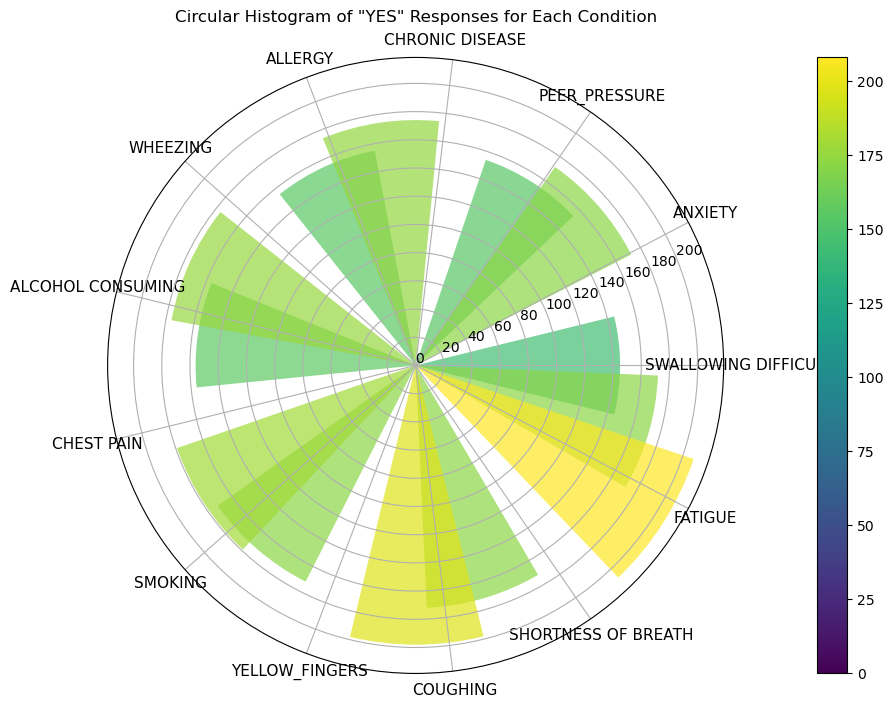

In [18]:
def create_circular_histogram(dataframe, columns_list):
    yes_counts = dataframe[columns_list].sum().sort_values()
    
    #Set up plot
    plt.figure(figsize=(12, 8))
    ax = plt.subplot(111, polar=True)
    width = (2 * np.pi) / len(yes_counts) #Recalculate width
    colors = plt.cm.viridis(yes_counts.values / float(max(yes_counts.values)))

    #Plotting balls
    bars = ax.bar(yes_counts.index, yes_counts.values, width=width, color=colors, alpha=0.7)

    #Set circumferences and radius
    ax.set_xticks(np.linspace(0, 2 * np.pi, len(yes_counts), endpoint=False))
    ax.set_xticklabels(yes_counts.index, fontsize=11, rotation=90)
    ax.set_yticks(np.arange(0, max(yes_counts.values), 20))
    ax.set_yticklabels(np.arange(0, max(yes_counts.values), 20))

    #Add legend and title
    sm = plt.cm.ScalarMappable(cmap=plt.cm.viridis, norm=plt.Normalize(0, max(yes_counts.values)))
    sm.set_array([])
    plt.colorbar(sm, pad=0.1)
    ax.set_title('Circular Histogram of "YES" Responses for Each Condition', va='bottom')
    ax.grid(True)

    plt.show()

create_circular_histogram(df, new_columns)

The histogram indicates a relatively uniform distribution across various health conditions, implying a potential correlation among them. This uniformity might suggest that the presence of one condition could be associated with the likelihood of others, which collectively could contribute to an increased risk of lung cancer.

# Feature Engineering

Create interaction terms to explore potential synergistic effects between demographic factors (like gender) and health conditions (like smoking). A cumulative risk score was created by summing various health condition indicators, providing a single metric that represents the overall health risk. Polynomial features for 'AGE' were generated to capture any non-linear relationships between age and lung cancer risk. Additionally, one-hot encoding was applied to the binned age categories, allowing machine learning models to better interpret these as distinct groups. Each of these steps aims to enhance the dataset's predictive power by uncovering more complex relationships within the data.

Transforming 'AGE' into bins or polynomial terms to helps in modeling non-linear relationships and interactions with the risk of lung cancer, which may not be captured by the raw numerical age. Similarly, encoding 'GENDER' allows for the inclusion of categorical data in a format that machine learning models can utilize, potentially revealing differences in disease prevalence or risk factors between genders.

In [19]:
# Binning 'AGE' and One-Hot Encoding for Binned Age
bins = [0, 30, 60, 90]
labels = ['Young', 'Middle', 'Senior']
df['AGE_BINNED'] = pd.cut(df['AGE'], bins=bins, labels=labels)
df = pd.get_dummies(df, columns=['AGE_BINNED'])

# One-Hot Encoding 'GENDER'
ohe = OneHotEncoder()
df_gender_encoded = ohe.fit_transform(df[['GENDER']]).toarray()
gender_columns = ohe.get_feature_names_out(['GENDER'])
df[gender_columns] = df_gender_encoded

# Drop the original 'GENDER' column
df = df.drop('GENDER', axis=1)

# Interaction between Gender and Smoking
df['GENDER_M_SMOKING'] = df['GENDER_M'] * df['SMOKING']

# Cumulative Risk Score
risk_factors = ['SMOKING', 'YELLOW_FINGERS', 'ANXIETY', 'PEER_PRESSURE', 'CHRONIC DISEASE']
df['CUMULATIVE_RISK'] = df[risk_factors].sum(axis=1)

# Polynomial Features for Age
df['AGE_SQUARED'] = df['AGE'] ** 2
df['AGE_CUBED'] = df['AGE'] ** 3

df.head()

,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,...,LUNG_CANCER,AGE_BINNED_Young,AGE_BINNED_Middle,AGE_BINNED_Senior,GENDER_F,GENDER_M,GENDER_M_SMOKING,CUMULATIVE_RISK,AGE_SQUARED,AGE_CUBED
0,69,0,1,1,0,0,1,0,1,1,...,1,False,False,True,0.0,1.0,0.0,2,4761,328509
1,74,1,0,0,0,1,1,1,0,0,...,1,False,False,True,0.0,1.0,1.0,2,5476,405224
2,59,0,0,0,1,0,1,0,1,0,...,0,False,True,False,1.0,0.0,0.0,1,3481,205379
3,63,1,1,1,0,0,0,0,0,1,...,0,False,False,True,0.0,1.0,1.0,3,3969,250047
4,63,0,1,0,0,0,0,0,1,0,...,0,False,False,True,1.0,0.0,0.0,1,3969,250047


In [20]:
kmeans = KMeans(n_clusters=3)
df['CONDITION_CLUSTER'] = kmeans.fit_predict(df[risk_factors])
df.head()

,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,...,AGE_BINNED_Young,AGE_BINNED_Middle,AGE_BINNED_Senior,GENDER_F,GENDER_M,GENDER_M_SMOKING,CUMULATIVE_RISK,AGE_SQUARED,AGE_CUBED,CONDITION_CLUSTER
0,69,0,1,1,0,0,1,0,1,1,...,False,False,True,0.0,1.0,0.0,2,4761,328509,0
1,74,1,0,0,0,1,1,1,0,0,...,False,False,True,0.0,1.0,1.0,2,5476,405224,1
2,59,0,0,0,1,0,1,0,1,0,...,False,True,False,1.0,0.0,0.0,1,3481,205379,2
3,63,1,1,1,0,0,0,0,0,1,...,False,False,True,0.0,1.0,1.0,3,3969,250047,0
4,63,0,1,0,0,0,0,0,1,0,...,False,False,True,1.0,0.0,0.0,1,3969,250047,2


# Data Preprocessing

In [21]:
X = df.drop('LUNG_CANCER', axis=1)
y = df['LUNG_CANCER']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ML Model Building

# Support Vector Machine

In [23]:
svm = SVC(C = 100, gamma = 0.002)
svm.fit(X_train, y_train)
svm_pred = svm.predict(X_test)
svm_conf = confusion_matrix(y_test, svm_pred)
svm_report = classification_report(y_test, svm_pred)
svm_acc = round(accuracy_score(y_test, svm_pred)*100, ndigits = 2)
print(f"Confusion Matrix : \n\n{svm_conf}")
print(f"\nClassification Report : \n\n{svm_report}")
print(f"\nThe Accuracy of Support Vector Machine is {svm_acc} %")

Confusion Matrix : 

[[ 1  1]
 [ 2 58]]

Classification Report : 

              precision    recall  f1-score   support

           0       0.33      0.50      0.40         2
           1       0.98      0.97      0.97        60

    accuracy                           0.95        62
   macro avg       0.66      0.73      0.69        62
weighted avg       0.96      0.95      0.96        62


The Accuracy of Support Vector Machine is 95.16 %


# Random Forest

In [24]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)
rf_conf = confusion_matrix(y_test, rf_predictions)
rf_report = classification_report(y_test, rf_predictions)
rf_acc = round(accuracy_score(y_test, rf_predictions)*100, ndigits = 2)
print(f"Confusion Matrix : \n\n{rf_conf}")
print(f"\nClassification Report : \n\n{rf_report}")
print(f"\nThe Accuracy of Random Forest Classifier is {rf_acc} %")

Confusion Matrix : 

[[ 1  1]
 [ 1 59]]

Classification Report : 

              precision    recall  f1-score   support

           0       0.50      0.50      0.50         2
           1       0.98      0.98      0.98        60

    accuracy                           0.97        62
   macro avg       0.74      0.74      0.74        62
weighted avg       0.97      0.97      0.97        62


The Accuracy of Random Forest Classifier is 96.77 %
